In [2]:
# Obviously, import needed packages
# Hint: this time, you'll also need Seaborn!
import urllib.request # module for downloading data from URLs
import seaborn as sb
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

##  Time to pratice some basics in Pandas using cute data about penguins :)
#### (1) Download (from rfd.atmos.uiuc.edu/Atms517/week7/penguins_size.csv'), using Python, the needed file
- yes, that link is correct
- a simplified version of a traditional data science dataset
- https://github.com/allisonhorst/palmerpenguins/blob/master/README.md  if you're in the mood for cute diagrams of penguins and their features...people are so creative! :)

In [3]:
filename = 'penguins_size.csv'
url = 'http://rfd.atmos.uiuc.edu/Atms517/week7/penguins_size.csv'

# download what is in the url and save it to the filename
urllib.request.urlretrieve(url, filename)

('penguins_size.csv', <http.client.HTTPMessage at 0x7f2608d7c8d0>)

#### (2) Read in 'penguins_size.csv' using Pandas 

In [4]:
# read the file into a dataframe
df = pd.read_csv(filename)

In [8]:
df.columns

Index(['species', 'island', 'culmen_length_mm', 'culmen_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146 entries, 0 to 151
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            146 non-null    object 
 1   island             146 non-null    object 
 2   beak_length_mm     146 non-null    float64
 3   beak_depth_mm      146 non-null    float64
 4   flipper_length_mm  146 non-null    float64
 5   body_mass_g        146 non-null    float64
 6   sex                146 non-null    object 
dtypes: float64(4), object(3)
memory usage: 9.1+ KB


#### (3) Print the first four and last four rows of this file (separately) using a specific method you learned in your lessons, to get a feel for your dataset.

In [5]:
# Print the first four and last four rows of this file (separately) using a specific method you learned in your lessons, to get a feel for your dataset.
print(df.head(4))
print('\n')
print(df.tail(4))

  species     island  culmen_length_mm  ...  flipper_length_mm  body_mass_g     sex
0  Adelie  Torgersen              39.1  ...              181.0       3750.0    MALE
1  Adelie  Torgersen              39.5  ...              186.0       3800.0  FEMALE
2  Adelie  Torgersen              40.3  ...              195.0       3250.0  FEMALE
3  Adelie  Torgersen               NaN  ...                NaN          NaN     NaN

[4 rows x 7 columns]


    species island  culmen_length_mm  ...  flipper_length_mm  body_mass_g     sex
148  Adelie  Dream              36.0  ...              195.0       3450.0  FEMALE
149  Adelie  Dream              37.8  ...              193.0       3750.0    MALE
150  Adelie  Dream              36.0  ...              187.0       3700.0  FEMALE
151  Adelie  Dream              41.5  ...              201.0       4000.0    MALE

[4 rows x 7 columns]


#### (4) In one line of code, access only the species, body_mass_g, and sex columns and save to a new variable. Print out this new variable!
- there is more than one way to do this
- feel free to show multiple ways if you'd like

In [7]:
data = df.loc[:, ['species', 'body_mass_g', 'sex']]
data

,species,body_mass_g,sex
0,Adelie,3750.0,MALE
1,Adelie,3800.0,FEMALE
2,Adelie,3250.0,FEMALE
3,Adelie,NaN,NaN
4,Adelie,3450.0,FEMALE
...,...,...,...
147,Adelie,3475.0,FEMALE
148,Adelie,3450.0,FEMALE
149,Adelie,3750.0,MALE
150,Adelie,3700.0,FEMALE


#### (5)  Using the dataframe that you read into in (2):  Culmen length and depth are unfamiliar animal characteristics to many of us.  Rename culmen_length_mm to beak_length_mm, and culmen_depth_mm to beak_depth_mm.
- You MUST ensure that after running this cell you've 'updated' your dataframe in a way that SAVES those updates and uses this updated version moving forward.  You can do this via either:
  - forcing an update to the current dataframe using the inplace=True argument when you call your function (PREFERRED) - modifies the dataframe 'in place'
  - overwriting your dataframe....i.e., if your dataframe's name is 'data'
     - data = data.nameoffunctionthat willrenamecolumns(necessary arguments to function) - this ovewrites your current data dataframe

In [9]:
# rename culmen_length_mm to beak_length_mm and culmen_depth_mm to beak_depth_mm
df = df.rename(columns={"culmen_length_mm": "beak_length_mm", "culmen_depth_mm": "beak_depth_mm"})
df

,species,island,beak_length_mm,beak_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
147,Adelie,Dream,36.6,18.4,184.0,3475.0,FEMALE
148,Adelie,Dream,36.0,17.8,195.0,3450.0,FEMALE
149,Adelie,Dream,37.8,18.1,193.0,3750.0,MALE
150,Adelie,Dream,36.0,17.1,187.0,3700.0,FEMALE


#### (6) Count the # of NaNs in each column.  Which column has the most?

In [10]:
# count the number of NaNs in each column. 
df.isnull().sum()


species              0
island               0
beak_length_mm       1
beak_depth_mm        1
flipper_length_mm    1
body_mass_g          1
sex                  6
dtype: int64

In [11]:
# which column has the most number of NaNs?
df.isnull().sum().idxmax()

'sex'

#### (7) Drop any rows that have at least one NaN, and then confirm that you have removed all NaNs

In [12]:
# Drop any rows that have at least one NaN, and then confirm that you have removed all NaNs
df.dropna(inplace=True)
df.isnull().sum()

species              0
island               0
beak_length_mm       0
beak_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

#### (8) For each numerical column, which you can think of as variables, each a characteristic of penguin, what is the maximum value? The minimum value?


In [27]:
# For each numerical column, which you can think of as variables, each a characteristic of penguin, what is the maximum value? The minimum value?
# get max and min of each column, except species, island, sex columns
for column in df.columns:
    if column == 'species' or column == 'island' or column == 'sex':
        pass
    else:
        print(f"Max and Min of df[{column}] is {df[column].max()} and {df[column].min()}")

Max and Min of df[beak_length_mm] is 46.0 and 32.1
Max and Min of df[beak_depth_mm] is 21.5 and 15.5
Max and Min of df[flipper_length_mm] is 210.0 and 172.0
Max and Min of df[body_mass_g] is 4775.0 and 2850.0


#### (9) Create a box-and-whisker plot (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html), using Pandas built-in plotting functionality, of a penguin characteristic of your choice.  

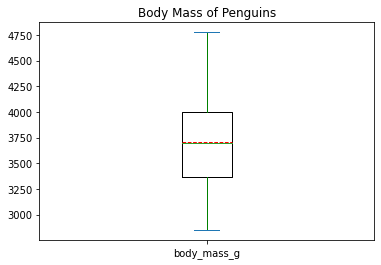

In [32]:
# Create a box-and-whisker plot (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html), using Pandas built-in plotting functionality, of a penguin characteristic of your choice. 
df['body_mass_g'].plot.box(
    title='Body Mass of Penguins',
    showfliers=False,
    showmeans=True,
    meanline=True,
    meanprops={'color': 'red'},
    whiskerprops={'color': 'green'},
    flierprops={'color': 'orange'},
    boxprops={'color': 'black'},
)

#### (10)  Describe the distribution of this characteristic, based on the box-and-whisker plot you created

The distribution of the body mass is a normal distribution. The median is around 3750g, the first quartile is around 3300g, and the third quartile is around 4000g. The maximum value is 4750, and the minimum value is around 2750. The interquartile range is about 700g. The distribution is slight right skewed, but it can be considered normal. There are no outliers.